# Potato Disease Classification

Dataset credits: https://www.kaggle.com/arjuntejaswi/plant-village

### Import all the Dependencies

In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML
import scipy


### Import data into tensorflow dataset object

Used splitfolders tool to split dataset into training, validation and test directories.

$ pip install split-folders

$ splitfolders --ratio 0.8 0.1 0.1 -- ./training/PlantVillage/


In [2]:
IMAGE_SIZE = 256
CHANNELS = 3

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True
)
train_generator = train_datagen.flow_from_directory(
        'dataset/train',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse",
#         save_to_dir="C:\\Code\\potato-disease-classification\\training\\AugmentedImages"
)

Found 1506 images belonging to 3 classes.


In [4]:
train_generator.class_indices

{'Potato___Early_blight': 0, 'Potato___Late_blight': 1, 'Potato___healthy': 2}

In [5]:
class_names = list(train_generator.class_indices.keys())
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [6]:
count=0
for image_batch, label_batch in train_generator:
#     print(label_batch)
    print(image_batch[0])
    break
#     count+=1
#     if count>2:
#         break

[[[0.6431373  0.58431375 0.6117647 ]
  [0.6431373  0.58431375 0.6117647 ]
  [0.6431373  0.58431375 0.6117647 ]
  ...
  [0.533837   0.4710919  0.5103076 ]
  [0.54182893 0.4790838  0.5182995 ]
  [0.55385685 0.4911118  0.53032744]]

 [[0.62832093 0.5694974  0.5969484 ]
  [0.6303923  0.5715688  0.59901977]
  [0.63246375 0.5736402  0.6010912 ]
  ...
  [0.5348727  0.47212762 0.5113433 ]
  [0.5433825  0.4806374  0.5198531 ]
  [0.55644614 0.49370104 0.5329167 ]]

 [[0.6201115  0.561288   0.588739  ]
  [0.6211472  0.5623237  0.58977467]
  [0.6221829  0.5633594  0.59081036]
  ...
  [0.5359084  0.4731633  0.512379  ]
  [0.544936   0.48219097 0.5214066 ]
  [0.5590354  0.49629033 0.535506  ]]

 ...

 [[0.6439324  0.6086383  0.620403  ]
  [0.67358065 0.63828653 0.65005124]
  [0.6718168  0.6312546  0.64565337]
  ...
  [0.6234115  0.5645879  0.5763526 ]
  [0.62030435 0.5614808  0.5732455 ]
  [0.6171972  0.5583737  0.5701384 ]]

 [[0.6485931  0.613299   0.6250637 ]
  [0.6772057  0.64191157 0.6536763 ]


In [7]:
validation_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)
validation_generator = validation_datagen.flow_from_directory(
        'dataset/val',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 215 images belonging to 3 classes.


In [8]:
test_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)

test_generator = test_datagen.flow_from_directory(
        'dataset/test',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 431 images belonging to 3 classes.


In [9]:
for image_batch, label_batch in test_generator:
    print(image_batch[0])
    break

[[[0.7607844  0.7568628  0.8196079 ]
  [0.76060164 0.7566801  0.81942517]
  [0.7563978  0.7524762  0.8152213 ]
  ...
  [0.5731033  0.5613386  0.6294481 ]
  [0.5423483  0.5305836  0.5977611 ]
  [0.5309648  0.5192001  0.58586675]]

 [[0.7620615  0.7581399  0.820885  ]
  [0.7607844  0.7568628  0.8196079 ]
  [0.7571738  0.7532522  0.8159973 ]
  ...
  [0.60797197 0.59620726 0.6628739 ]
  [0.62008756 0.60832286 0.6749895 ]
  [0.6199572  0.6081925  0.67485917]]

 [[0.7643914  0.76046985 0.82321495]
  [0.7607844  0.7568628  0.8196079 ]
  [0.75763977 0.7537182  0.81646335]
  ...
  [0.49852285 0.48675814 0.55342484]
  [0.4794174  0.4676527  0.5343194 ]
  [0.47751614 0.46575144 0.53241813]]

 ...

 [[0.6672867  0.65944356 0.7143455 ]
  [0.67008764 0.6622445  0.71714646]
  [0.67521346 0.6673703  0.72227234]
  ...
  [0.5138722  0.49818593 0.55700946]
  [0.44648525 0.43079898 0.4896225 ]
  [0.42528677 0.4096005  0.46842402]]

 [[0.7077935  0.69995034 0.7548523 ]
  [0.7083879  0.7005448  0.75544673]


## Building the Model

In [10]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(32, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 64)       0

### Compiling the Model
We use `adam` Optimizer, `SparseCategoricalCrossentropy` for losses, `accuracy` as a metric

In [12]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [13]:
1506/32

47.0625

In [14]:
215/32

6.71875

In [15]:
history = model.fit(
    train_generator,
    steps_per_epoch=47,
    batch_size=32,
    validation_data=validation_generator,
    validation_steps=6,
    verbose=1,
    epochs=20,
)

Epoch 1/20
47/47 [==============================] - 29s 396ms/step - loss: 0.9106 - accuracy: 0.4878 - val_loss: 0.8711 - val_accuracy: 0.4583
Epoch 2/20
47/47 [==============================] - 17s 362ms/step - loss: 0.8567 - accuracy: 0.5360 - val_loss: 0.7236 - val_accuracy: 0.6823
Epoch 3/20
47/47 [==============================] - 16s 327ms/step - loss: 0.5283 - accuracy: 0.7734 - val_loss: 0.3915 - val_accuracy: 0.8281
Epoch 4/20
47/47 [==============================] - 16s 330ms/step - loss: 0.3640 - accuracy: 0.8521 - val_loss: 0.3125 - val_accuracy: 0.8542
Epoch 5/20
47/47 [==============================] - 17s 359ms/step - loss: 0.3776 - accuracy: 0.8501 - val_loss: 0.3861 - val_accuracy: 0.8281
Epoch 6/20
47/47 [==============================] - 18s 372ms/step - loss: 0.3178 - accuracy: 0.8684 - val_loss: 0.4785 - val_accuracy: 0.7917
Epoch 7/20
47/47 [==============================] - 18s 374ms/step - loss: 0.2863 - accuracy: 0.8853 - val_loss: 0.3633 - val_accuracy: 0.8490

In [16]:
scores = model.evaluate(test_generator)

14/14 [==============================] - 5s 326ms/step - loss: 0.1203 - accuracy: 0.9536


In [17]:
scores

[0.1203315481543541, 0.953596293926239]

Scores is just a list containing loss and accuracy value

### Plotting the Accuracy and Loss Curves

In [18]:
history

You can read documentation on history object here: https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/History

In [19]:
history.params

{'verbose': 1, 'epochs': 20, 'steps': 47}

In [20]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

**loss, accuracy, val loss etc are a python list containing values of loss, accuracy etc at the end of each epoch**

In [21]:
type(history.history['loss'])

list

In [22]:
len(history.history['loss'])

20

In [23]:
history.history['loss'][:5] # show loss for first 5 epochs

[0.9106135368347168,
 0.8566508889198303,
 0.5283005237579346,
 0.3639683425426483,
 0.37756818532943726]

In [24]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [25]:
val_acc

[0.4583333432674408,
 0.6822916865348816,
 0.828125,
 0.8541666865348816,
 0.828125,
 0.7916666865348816,
 0.8489583134651184,
 0.8697916865348816,
 0.9114583134651184,
 0.9114583134651184,
 0.9010416865348816,
 0.9114583134651184,
 0.9375,
 0.9427083134651184,
 0.9791666865348816,
 0.9739583134651184,
 0.9427083134651184,
 0.9635416865348816,
 0.9739583134651184,
 0.96875]

In [26]:
acc

[0.4877883195877075,
 0.5359565615653992,
 0.7734056711196899,
 0.8521031141281128,
 0.8500678539276123,
 0.868385374546051,
 0.885345995426178,
 0.898236095905304,
 0.9294437170028687,
 0.9314789772033691,
 0.9430122375488281,
 0.9341926574707031,
 0.9518317580223083,
 0.9674355387687683,
 0.9592944383621216,
 0.9633650183677673,
 0.9789687991142273,
 0.9748982191085815,
 0.9905020594596863,
 0.9667571187019348]

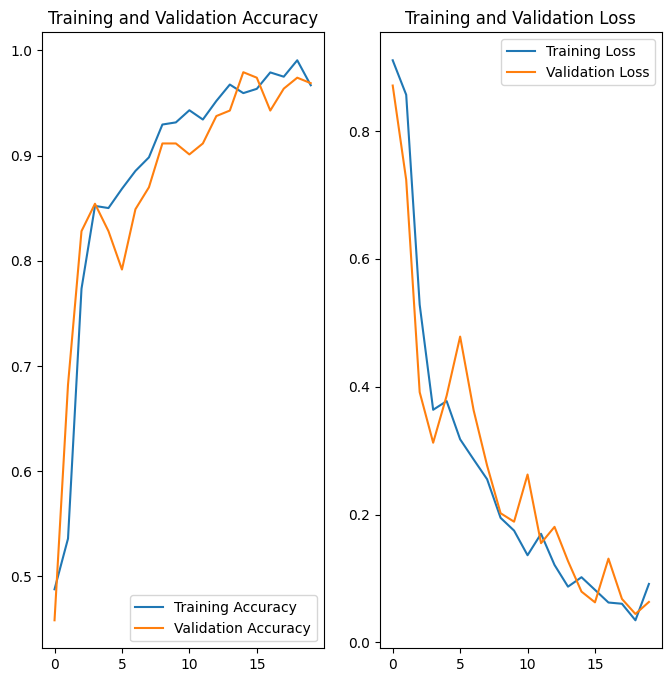

In [27]:
EPOCHS = 20

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Run prediction on a sample image

In [30]:
test_generator

first image to predict
actual label: Potato___Early_blight
1/1 [==============================] - 0s 179ms/step
predicted label: Potato___Early_blight


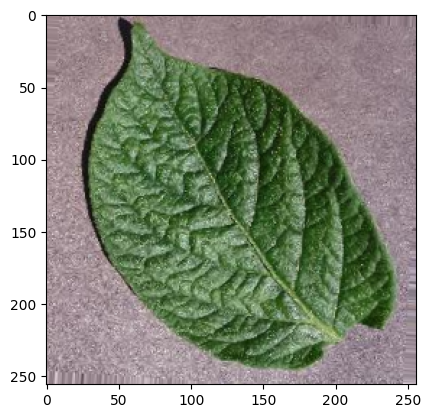

In [31]:
import numpy as np


for images_batch, labels_batch in test_generator:
    first_image = image_batch[0]
    first_label = int(labels_batch[0])
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])
    
    break

### Write a function for inference

In [32]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

**Now run inference on few sample images**

1/1 [==============================] - 0s 18ms/step


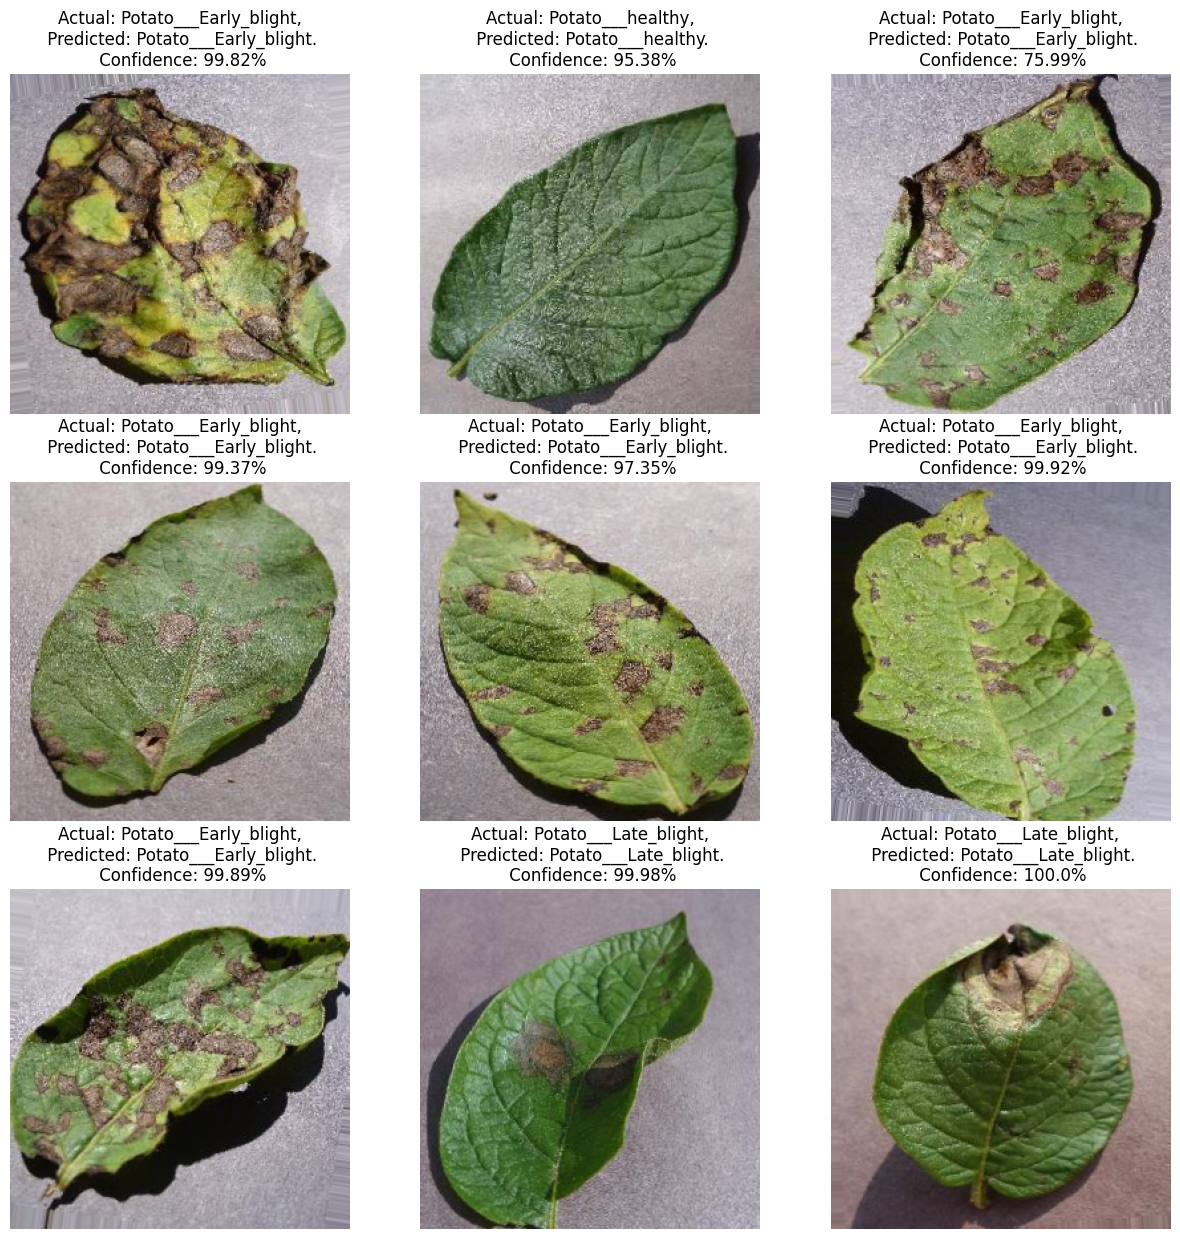

In [33]:
plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break

### Saving the Model

Save model in h5 format so that there is just one file and we can upload that to GCP conveniently

In [34]:
model.save("/potatoes.h5")